<a href="https://colab.research.google.com/github/saritmaitra/traffic_flow_lstm/blob/main/Traffic_Flow_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Processing the data
"""
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling Normalization
from sklearn.preprocessing import RobustScaler, MinMaxScaler

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# train the network using input dataset
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
df = pd.read_csv('Traffic_Data.csv', encoding='utf-8').fillna(0)
df

,Local Date,Local Time,Day Type ID,Total Carriageway Flow,Total Flow vehicles less than 5.2m,Total Flow vehicles 5.21m - 6.6m,Total Flow vehicles 6.61m - 11.6m,Total Flow vehicles above 11.6m,Speed Value
0,1/1/2014,0:00:00,14,8.0,0.0,0.0,0.0,0.0,96.39
1,1/1/2014,0:15:00,14,15.0,0.0,0.0,0.0,0.0,98.69
2,1/1/2014,0:30:00,14,20.5,0.0,0.0,0.0,0.0,96.98
3,1/1/2014,0:45:00,14,26.0,0.0,0.0,0.0,0.0,102.98
4,1/1/2014,1:00:00,14,21.0,0.0,0.0,0.0,0.0,102.26
...,...,...,...,...,...,...,...,...,...
35035,31/12/2014,22:45:00,13,24.0,23.0,1.0,0.0,0.0,101.26
35036,31/12/2014,23:00:00,13,10.0,10.0,0.0,0.0,0.0,101.26
35037,31/12/2014,23:15:00,13,10.0,10.0,0.0,0.0,0.0,101.26
35038,31/12/2014,23:30:00,13,16.0,15.0,1.0,0.0,0.0,96.35


In [ ]:
df.columns

Index(['Local Date', ' Local Time', ' Day Type ID', ' Total Carriageway Flow', ' Total Flow vehicles less than 5.2m',
       ' Total Flow vehicles 5.21m - 6.6m', ' Total Flow vehicles 6.61m - 11.6m', ' Total Flow vehicles above 11.6m', ' Speed Value'],
      dtype='object')

In [ ]:
dict = {'Local Date': 'date',
        ' Local Time': 'time',
        ' Total Carriageway Flow': 'vehicles_flow'}
df.rename(columns=dict,inplace=True)
df['datetime'] = pd.to_datetime(df['date'].apply(str)+' '+df['time'])
df = df[['datetime', 'vehicles_flow']]
display(df)

,datetime,vehicles_flow
0,2014-01-01 00:00:00,8.0
1,2014-01-01 00:15:00,15.0
2,2014-01-01 00:30:00,20.5
3,2014-01-01 00:45:00,26.0
4,2014-01-01 01:00:00,21.0
...,...,...
35035,2014-12-31 22:45:00,24.0
35036,2014-12-31 23:00:00,10.0
35037,2014-12-31 23:15:00,10.0
35038,2014-12-31 23:30:00,16.0


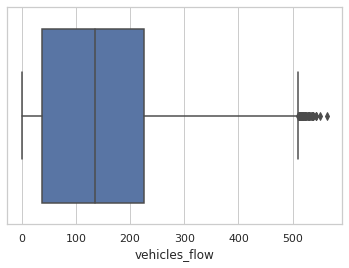

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["vehicles_flow"])

In [ ]:
df = df.set_index('datetime')
df

,vehicles_flow
datetime,
2014-01-01 00:00:00,8.0
2014-01-01 00:15:00,15.0
2014-01-01 00:30:00,20.5
2014-01-01 00:45:00,26.0
2014-01-01 01:00:00,21.0
...,...
2014-12-31 22:45:00,24.0
2014-12-31 23:00:00,10.0
2014-12-31 23:15:00,10.0


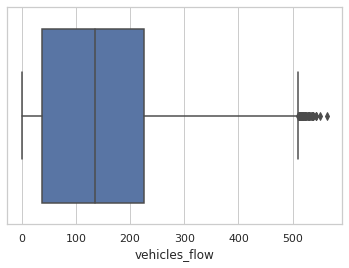

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["vehicles_flow"])

                 count        mean         std   min   25%    50%    75%    max
vehicles_flow  35040.0  142.783217  110.066364  1.25  37.0  135.0  226.0  563.0


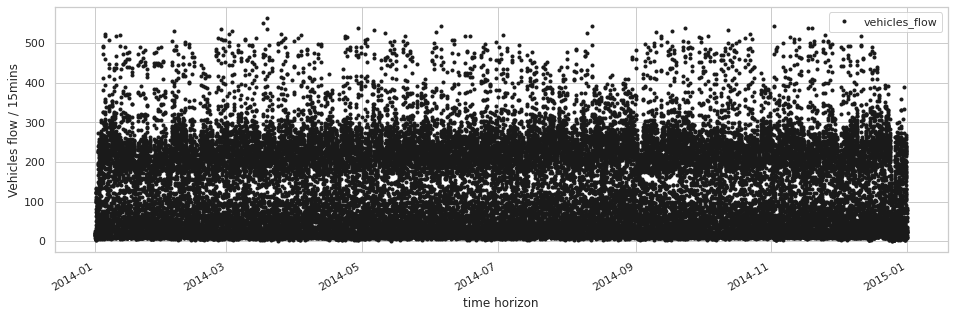

In [ ]:
df.plot(style='k.', figsize=(16,5))
print(df.describe().transpose())
plt.ylabel('Vehicles flow / 15mins')
plt.xlabel('time horizon')
plt.show()

                count        mean         std   min    25%    50%    75%     max
vehicles_flow  8760.0  571.132868  428.918717  8.75  148.0  563.0  899.0  1799.0


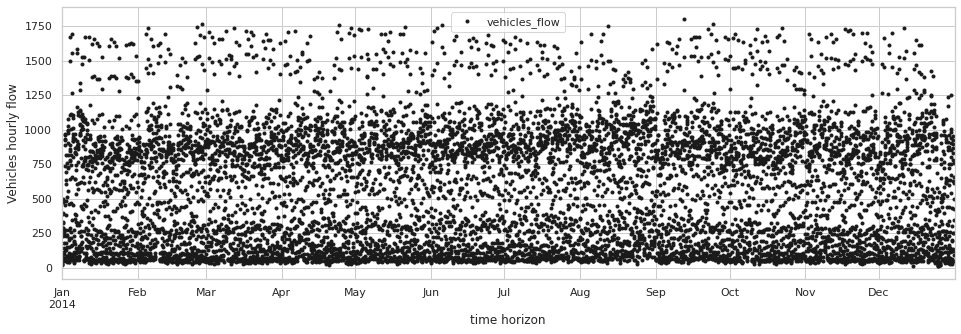

In [ ]:
df_hrly = df.resample('60T').sum()
print(df_hrly.describe().transpose())
df_hrly.plot(style='k.', figsize=(16,5))
plt.ylabel('Vehicles hourly flow')
plt.xlabel('time horizon')
plt.show()

                count         mean         std    min     25%     50%      75%     max
vehicles_flow  1460.0  3426.797205  2280.08526  139.5  1240.0  2795.0  5538.25  7478.0


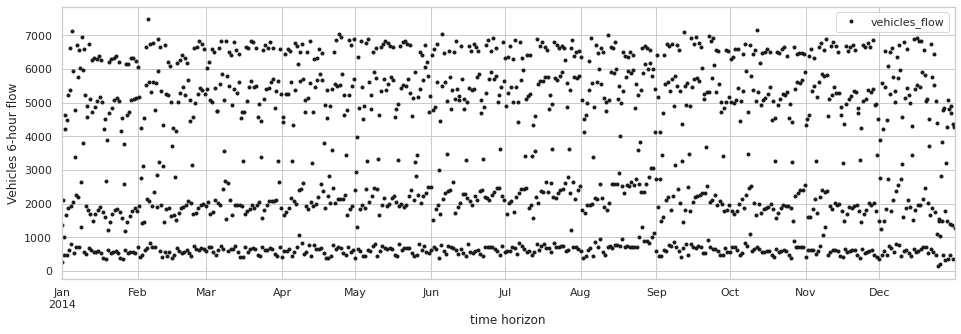

In [ ]:
df_6hr = df.resample('360T').sum()
print(df_6hr.describe().transpose())
df_6hr.plot(style='k.', figsize=(16,5))
plt.ylabel('Vehicles 6-hour flow')
plt.xlabel('time horizon')
plt.show()

               count          mean          std     min       25%      50%      75%       max
vehicles_flow  365.0  13707.188822  2057.118634  4222.5  12536.88  14318.5  15164.5  18032.25


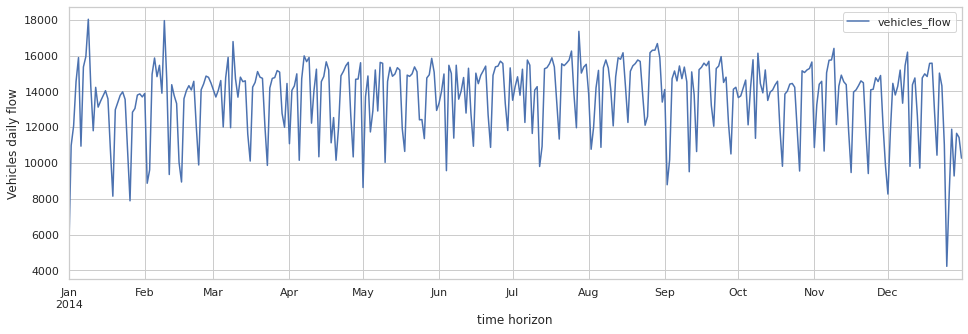

In [ ]:
df_daily = df.resample('D').sum()
print(df_daily.describe().transpose())
df_daily.plot(figsize=(16,5))
plt.ylabel('Vehicles daily flow')
plt.xlabel('time horizon')
plt.show()

## Getting new features

In [ ]:
df.reset_index(inplace=True)
df['datetime'] = df['datetime'].astype('datetime64[ns]')
df.loc[:,'weekday'] = df['datetime'].dt.weekday

# Feature engineering with the date
df.loc[:,'year']= df['datetime'].dt.year 
df.loc[:,'month']= df['datetime'].dt.month 
df.loc[:,'day']= df['datetime'].dt.day

df.head(3)

# original_df = df.copy()

,datetime,vehicles_flow,weekday,year,month,day
0,2014-01-01 00:00:00,8.0,2,2014,1,1
1,2014-01-01 00:15:00,15.0,2,2014,1,1
2,2014-01-01 00:30:00,20.5,2,2014,1,1


In [ ]:
df.tail(2)

## Train/Test Preparation

## Keras LSTM

In [ ]:
df.tail()

data = df[['datetime','vehicles_flow', 'weekday', 'month', 'day']]
data = data.set_index(['datetime'])
data.head(3)

,vehicles_flow,weekday,month,day
datetime,,,,
2014-01-01 00:00:00,8.0,2,1,1
2014-01-01 00:15:00,15.0,2,1,1
2014-01-01 00:30:00,20.5,2,1,1


In [ ]:

"""
We have used RobustScaler so that extreme outliers will have little effect 
and hopefully improve training time and overall model performance.
"""

# Scale fitting the close prices separately for inverse_transformations purposes later
vehicles_flow_scaler = RobustScaler()

vehicles_flow_scaler.fit(data[['vehicles_flow']])

# Normalizing/Scaling the DF
scaler = RobustScaler()


data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data.tail()


,vehicles_flow,weekday,month,day
datetime,,,,
2014-12-31 22:45:00,-0.587302,-0.25,0.833333,1.0
2014-12-31 23:00:00,-0.661376,-0.25,0.833333,1.0
2014-12-31 23:15:00,-0.661376,-0.25,0.833333,1.0
2014-12-31 23:30:00,-0.629630,-0.25,0.833333,1.0
2014-12-31 23:45:00,-0.666667,-0.25,0.833333,1.0


In [ ]:
def split_sequence(seq, num_steps_in, num_steps_out):
    """
    This function splits a multivariate time sequence. 
    In our case, the input values are going to be the Closing prices and indicators for a stock. 
    This will split the values into our X and y variables. 
    The X values will contain the past closing prices and technical indicators. 
    The y values will contain our target values (future closing prices only).
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + num_steps_in
        out_end = end + num_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [ ]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    This function will help us evaluate the Neural Network we just created. 
    The thing we are looking for when evaluating our NN is convergence. 
    The validation values and regular values for Loss and Accuracy must start to align as training progresses. 
    If they do not converge, then that may be a sign of overfitting/underfitting. 
    We must go back and modify the construction of the NN, which means to alter the number of layers/nodes, 
    change the optimizer function, etc.
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

In [ ]:
def layer_maker(num_layers, num_nodes, activation, drop=None, dropout_rate=0.5):
    """
    Creates a specified number of hidden layers for an RNN
    This function constructs the body of our NN. 
    Here we can customize the number of layers and nodes. 
    It also has a regularization option of adding Dropout layers if necessary to prevent overfitting/underfitting.
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1, num_layers+1):
        LSTM_model.add(tf.keras.layers.LSTM(num_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                LSTM_model.add(tf.keras.layers.Dropout(dropout_rate))
        except:
            pass

In [ ]:
data.columns[0]

In [ ]:
def validater(num_periods_in, num_periods_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    This function creates a DF with predicted values for a specific range of dates. 
    This range rolls forward with each loop. 
    The intervals for the range are customizable. 
    We use this DF to evaluate the model’s predictions by comparing them to the actual values later on.
    """
    
    # Creating an empty DF to store the predictions
    LSTM_predictions = pd.DataFrame(index=data.index, columns=[data.columns[0]])

    for i in range(num_periods_in, len(data) - num_periods_in, num_periods_out):
        # Creating rolling intervals to predict off of
        x = data[-i - num_periods_in:-i]

        # Predicting using rolling intervals
        yhat = LSTM_model.predict(np.array(x).reshape(1, num_periods_in, num_features))

        # Transforming values back to their normal prices
        yhat = vehicles_flow_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="15min"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        LSTM_predictions.update(pred_df)
    return LSTM_predictions

In [ ]:
def val_rmse(df1, df2):
    """
    Calculates the root mean square error between the two Dataframes
    This function will return the root mean squared error (RMSE) of our model’s predictions compared to the actual values. 
    The value returned represents how far off our model’s predictions are on average. 
    The general goal is to reduce the RMSE of our model’s predictions.
    """
    data = df1.copy()
    
    # Adding a new column with the closing prices from the second DF
    data['vehicles_flow2'] = df2['vehicles_flow']
    
    # Dropping the NaN values
    data.dropna(inplace=True)
    
    # Adding another column containing the difference between the two DFs' closing prices
    data['diff'] = data['vehicles_flow'] - data['vehicles_flow2']
    
    # Squaring the difference and getting the mean
    rms = (data[['diff']]**2).mean()
    
    # Returning the sqaure root of the root mean square
    return float(np.sqrt(rms))

In [ ]:
# How many periods looking back to learn
num_periods_in = 60
# How many periods to predict
num_periods_out = 30
# Features 
num_features = data.shape[1]

"""
What our NN will do with this information is learn how the last 60 periods of vehicle flow and 
to predict next 30 periods of vehicle flow.
"""
# Splitting the data into appropriate sequences
X, y = split_sequence(data.to_numpy(), num_periods_in, num_periods_out)
print(X.shape, y.shape)

(34951, 60, 4) (34951, 30)


In [ ]:
# Instatiating the model
LSTM_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(input_shape=(num_periods_in, num_features)),
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  tf.keras.layers.Dense(3, activation='relu'),
                                  tf.keras.layers.Dense(num_periods_out)
])

LSTM_model.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error, 
                   metrics=['accuracy'])

# eatrly stopping to avoid overfitting     
early_stop = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                           verbose=0)]

n_epochs = 100
batch_size = X.shape[0]//num_features

# Fitting and Training
LSTM_result = LSTM_model.fit(X, y, epochs=n_epochs, batch_size=batch_size, 
                validation_split=0.20, callbacks=early_stop)

Epoch 1/100
4/4 [==============================] - 1s 143ms/step - loss: 0.3446 - accuracy: 0.0460 - val_loss: 0.3398 - val_accuracy: 0.0335
Epoch 2/100
4/4 [==============================] - 0s 105ms/step - loss: 0.3406 - accuracy: 0.0245 - val_loss: 0.3387 - val_accuracy: 0.0255
Epoch 3/100
4/4 [==============================] - 0s 97ms/step - loss: 0.3401 - accuracy: 0.0239 - val_loss: 0.3389 - val_accuracy: 0.0233
Epoch 4/100
4/4 [==============================] - 0s 106ms/step - loss: 0.3395 - accuracy: 0.0241 - val_loss: 0.3387 - val_accuracy: 0.0227
Epoch 5/100
4/4 [==============================] - 0s 101ms/step - loss: 0.3387 - accuracy: 0.0244 - val_loss: 0.3383 - val_accuracy: 0.0245
Epoch 6/100
4/4 [==============================] - 0s 97ms/step - loss: 0.3375 - accuracy: 0.0247 - val_loss: 0.3372 - val_accuracy: 0.0259
Epoch 7/100
4/4 [==============================] - 0s 102ms/step - loss: 0.3362 - accuracy: 0.0266 - val_loss: 0.3358 - val_accuracy: 0.0266
Epoch 8/100
4/4

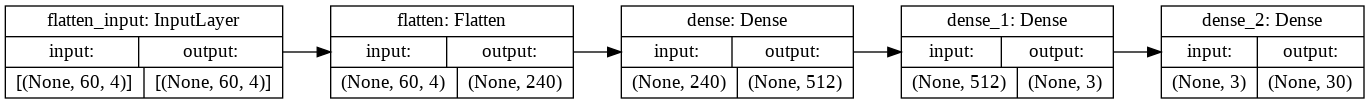

In [ ]:
tf.keras.utils.plot_model(LSTM_model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='LR',
                          expand_nested=True,
                          dpi=96)

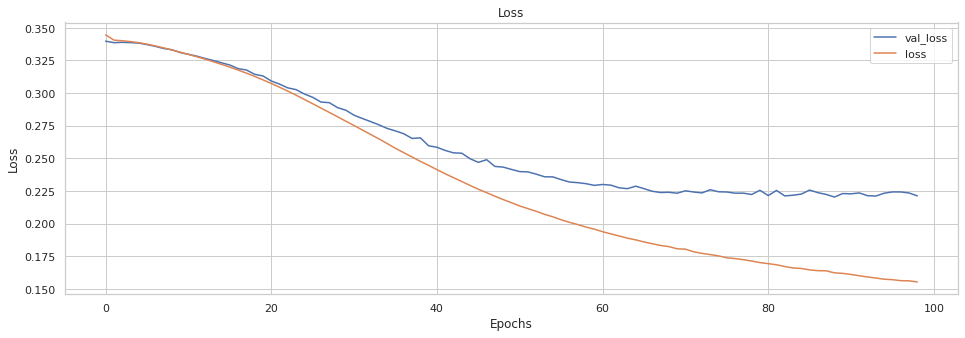

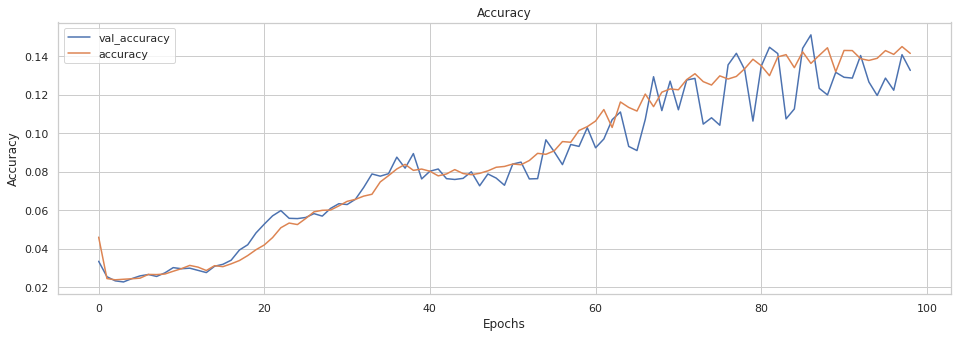

In [ ]:
visualize_training_results(LSTM_result)

In [ ]:
# Transforming the actual values to their original numbers
actual = pd.DataFrame(vehicles_flow_scaler.inverse_transform(data[['vehicles_flow']]), 
                      index=data.index, 
                      columns=[data.columns[0]])

# Getting a DF of the predicted values to validate against
LSTM_predictions = validater(num_periods_in, num_periods_out)

# Printing the RMSE
print("RMSE:", val_rmse(actual, LSTM_predictions))   

RMSE: 73.81911827972112


                     vehicles_flow
2014-12-31 23:45:00      35.572159
2015-01-01 00:00:00      92.798607
2015-01-01 00:15:00      43.389862
2015-01-01 00:30:00      34.941490
2015-01-01 00:45:00      52.632965
2015-01-01 01:00:00      61.713417
2015-01-01 01:15:00      76.537941
2015-01-01 01:30:00      59.016060
2015-01-01 01:45:00      53.309334
2015-01-01 02:00:00      98.957657
2015-01-01 02:15:00      73.318680
2015-01-01 02:30:00      70.970360
2015-01-01 02:45:00      83.193008
2015-01-01 03:00:00     114.641602
2015-01-01 03:15:00     102.995613
2015-01-01 03:30:00      99.044853
2015-01-01 03:45:00     116.970711
2015-01-01 04:00:00     146.310349
2015-01-01 04:15:00     106.478218
2015-01-01 04:30:00     176.018799
2015-01-01 04:45:00     170.914307
2015-01-01 05:00:00     177.703110
2015-01-01 05:15:00     197.179520
2015-01-01 05:30:00     206.664520
2015-01-01 05:45:00     212.716705
2015-01-01 06:00:00     221.419113
2015-01-01 06:15:00     227.335449
2015-01-01 06:30:00 

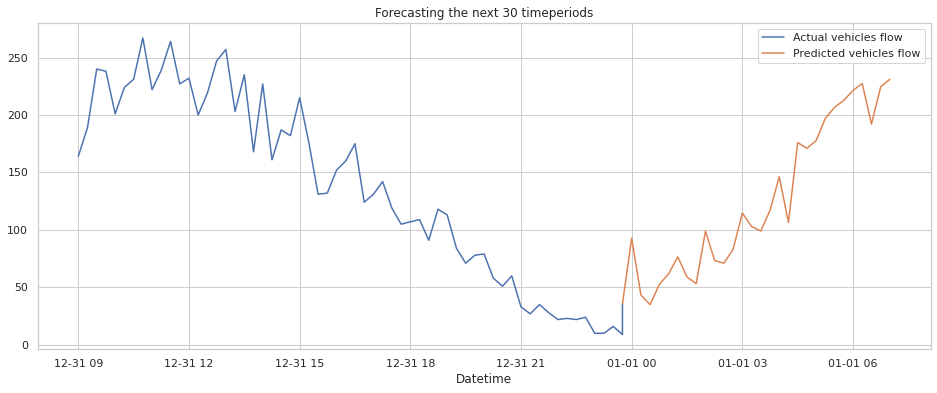

In [ ]:
# Predicting off of the most recent days from the original DF
yhat = LSTM_model.predict(np.array(data.tail(num_periods_in)).reshape(1, num_periods_in, num_features))

# Transforming the predicted values back to their original format
yhat = vehicles_flow_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
predict = pd.DataFrame(yhat, 
                     index=pd.date_range(start=data.index[-1],
                                         periods=len(yhat), 
                                         freq='15min'), columns=[data.columns[0]])

# Transforming the actual values to their original price
actual = pd.DataFrame(vehicles_flow_scaler.inverse_transform(data[["vehicles_flow"]].tail(num_periods_in)), 
                      index=data['vehicles_flow'].tail(num_periods_in).index, 
                      columns=[data.columns[0]]).append(predict.head(1))

# Printing the predicted prices
print(predict)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual vehicles flow")
plt.plot(predict, label="Predicted vehicles flow")
# plt.ylabel("Price")
plt.xlabel("Datetime")
plt.title(f"Forecasting the next {len(yhat)} timeperiods")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Creating the NN

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Instatiating the model
LSTM_model = tf.keras.Sequential()

# Activation
activ = "relu"

# Input layer
LSTM_model.add(tf.keras.layers.LSTM(60, activation=activ, return_sequences=True, 
               input_shape=(num_periods_in, num_features)))

# Hidden layers
layer_maker(num_layers=4, num_nodes= 20, activation=activ)

# Final Hidden layer
LSTM_model.add(tf.keras.layers.LSTM(20, activation=activ))

# Output layer
LSTM_model.add(tf.keras.layers.Dense(num_periods_out))

# Model summary
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 60)            15600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 20)            6480      
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 20)            3280      
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 20)            3280      
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 20)            3280      
_________________________________________________________________
lstm_6 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 30)               

In [ ]:
# Compiling the data with selected specifications
LSTM_model.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error, 
                   metrics=['accuracy'])

# eatrly stopping to avoid overfitting     
early_stop = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                           verbose=0)]

n_epochs = 100
batch_size = X.shape[0]//num_features

# Fitting and Training
LSTM_result = LSTM_model.fit(X, y, epochs=n_epochs, batch_size=batch_size, 
                validation_split=0.20, callbacks=early_stop)

Epoch 1/100
4/4 [==============================] - 33s 6s/step - loss: 0.3869 - accuracy: 0.1163 - val_loss: 0.3299 - val_accuracy: 0.0925
Epoch 2/100
4/4 [==============================] - 24s 6s/step - loss: 0.2723 - accuracy: 0.0726 - val_loss: 0.2919 - val_accuracy: 0.0441
Epoch 3/100
4/4 [==============================] - 24s 6s/step - loss: 0.2642 - accuracy: 0.0545 - val_loss: 0.2848 - val_accuracy: 0.0462
Epoch 4/100
4/4 [==============================] - 24s 6s/step - loss: 0.2653 - accuracy: 0.0547 - val_loss: 0.2814 - val_accuracy: 0.0479
Epoch 5/100
4/4 [==============================] - 24s 6s/step - loss: 0.2597 - accuracy: 0.0573 - val_loss: 0.2744 - val_accuracy: 0.0524
Epoch 6/100
4/4 [==============================] - 24s 6s/step - loss: 0.2485 - accuracy: 0.0636 - val_loss: 0.2765 - val_accuracy: 0.0649
Epoch 7/100
4/4 [==============================] - 24s 6s/step - loss: 0.2434 - accuracy: 0.0713 - val_loss: 0.2723 - val_accuracy: 0.0695
Epoch 8/100
4/4 [==========

Since it’s a regression problem, we’re monitoring the mean absolute error and the mean squared error. Here’s the model plotted to an image. The input is 10 since the dataset we generated has 10 features.

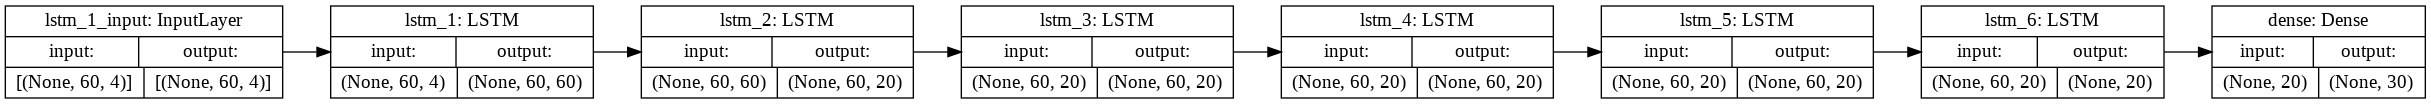

In [ ]:
tf.keras.utils.plot_model(LSTM_model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='LR',
                          expand_nested=True,
                          dpi=96)

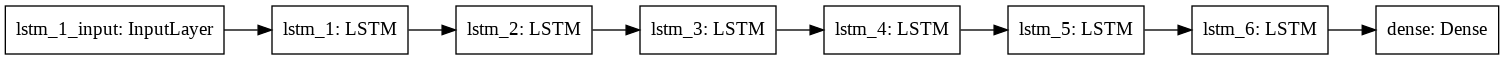

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(LSTM_model, to_file='model.png', rankdir='LR')

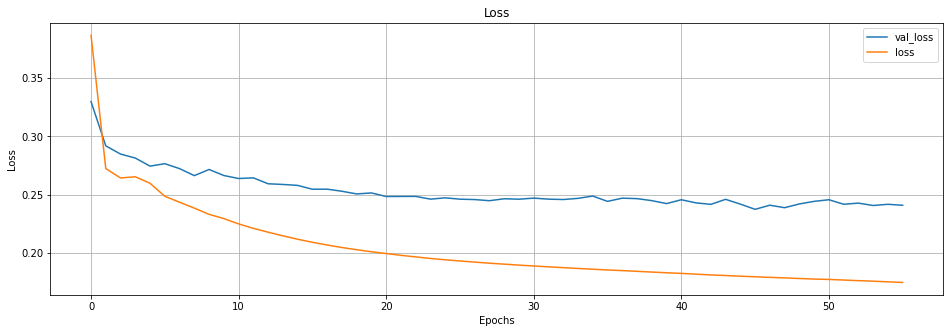

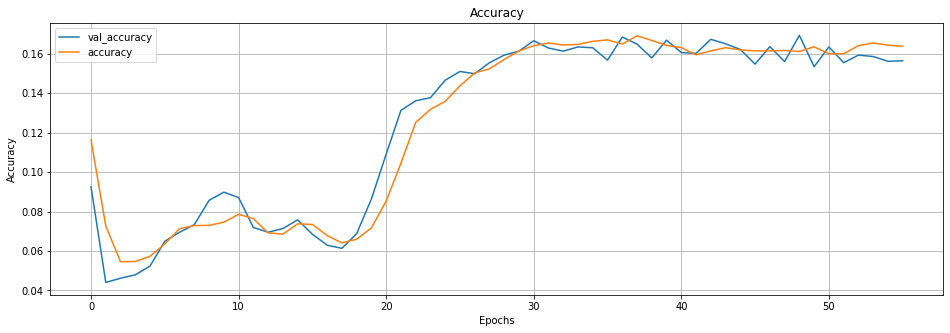

In [ ]:
visualize_training_results(LSTM_result)

In [ ]:
# Transforming the actual values to their original numbers
actual = pd.DataFrame(vehicles_flow_scaler.inverse_transform(data[['vehicles_flow']]), 
                      index=data.index, 
                      columns=[data.columns[0]])

# Getting a DF of the predicted values to validate against
LSTM_predictions = validater(num_periods_in, num_periods_out)

# Printing the RMSE
print("RMSE:", val_rmse(actual, LSTM_predictions))   

RMSE: 78.64493126020203


                     vehicles_flow
2014-12-31 23:45:00     -22.087204
2015-01-01 00:00:00     -16.917114
2015-01-01 00:15:00      17.536316
2015-01-01 00:30:00      14.342247
2015-01-01 00:45:00      -7.403717
2015-01-01 01:00:00      18.601913
2015-01-01 01:15:00      13.752480
2015-01-01 01:30:00      34.634224
2015-01-01 01:45:00      37.238091
2015-01-01 02:00:00      54.162865
2015-01-01 02:15:00      57.615120
2015-01-01 02:30:00      76.447647
2015-01-01 02:45:00     121.955040
2015-01-01 03:00:00      99.786148
2015-01-01 03:15:00     161.647675
2015-01-01 03:30:00     207.306580
2015-01-01 03:45:00     242.927063
2015-01-01 04:00:00     274.227661
2015-01-01 04:15:00     270.755066
2015-01-01 04:30:00     312.599579
2015-01-01 04:45:00     330.794312
2015-01-01 05:00:00     369.042053
2015-01-01 05:15:00     396.297546
2015-01-01 05:30:00     368.292206
2015-01-01 05:45:00     355.816437
2015-01-01 06:00:00     340.604492
2015-01-01 06:15:00     311.574249
2015-01-01 06:30:00 

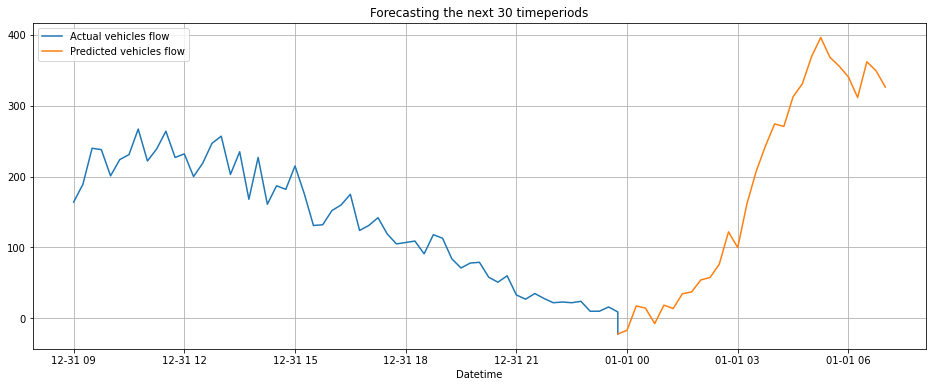

In [ ]:
from datetime import timedelta

# Predicting off of the most recent days from the original DF
yhat = LSTM_model.predict(np.array(data.tail(num_periods_in)).reshape(1, num_periods_in, num_features))

# Transforming the predicted values back to their original format
yhat = vehicles_flow_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
predict = pd.DataFrame(yhat, 
                     index=pd.date_range(start=data.index[-1],
                                         periods=len(yhat), 
                                         freq='15min'), columns=[data.columns[0]])

# Transforming the actual values to their original price
actual = pd.DataFrame(vehicles_flow_scaler.inverse_transform(data[["vehicles_flow"]].tail(num_periods_in)), 
                      index=data['vehicles_flow'].tail(num_periods_in).index, 
                      columns=[data.columns[0]]).append(predict.head(1))

# Printing the predicted prices
print(predict)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual vehicles flow")
plt.plot(predict, label="Predicted vehicles flow")
# plt.ylabel("Price")
plt.xlabel("Datetime")
plt.title(f"Forecasting the next {len(yhat)} timeperiods")
plt.legend()
plt.grid(True)
plt.show()

##**GRU**

In [ ]:
def layer_maker(num_layers, num_nodes, activation, drop=None, dropout_rate=0.3):
    """
    Creates a specified number of hidden layers for an RNN
    This function constructs the body of our NN. 
    Here we can customize the number of layers and nodes. 
    It also has a regularization option of adding Dropout layers if necessary to prevent overfitting/underfitting.
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1, num_layers+1):
        model_GRU.add(GRU(num_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model_GRU.add(tf.keras.layers.Dropout(dropout_rate))
        except:
            pass

In [ ]:
def validater(num_periods_in, num_periods_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    This function creates a DF with predicted values for a specific range of dates. 
    This range rolls forward with each loop. 
    The intervals for the range are customizable. 
    We use this DF to evaluate the model’s predictions by comparing them to the actual values later on.
    """
    
    # Creating an empty DF to store the predictions
    GRU_predictions = pd.DataFrame(index=data.index, columns=[data.columns[0]])

    for i in range(num_periods_in, len(data) - num_periods_in, num_periods_out):
        # Creating rolling intervals to predict off of
        x = data[-i - num_periods_in:-i]

        # Predicting using rolling intervals
        yhat = model_GRU.predict(np.array(x).reshape(1, num_periods_in, num_features))

        # Transforming values back to their normal prices
        yhat = vehicles_flow_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="15min"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        GRU_predictions.update(pred_df)
    return GRU_predictions

In [ ]:
from keras.layers import GRU

# Instatiating the model
model_GRU = tf.keras.Sequential()

# Activation
activ = "relu"

# Input layer
model_GRU.add(tf.keras.layers.GRU(60, activation=activ, return_sequences=True, 
               input_shape=(num_periods_in, num_features)))

# Hidden layers
layer_maker(num_layers=4, num_nodes= 20, activation=activ)

# Final Hidden layer
model_GRU.add(tf.keras.layers.GRU(20, activation=activ))

# Output layer
model_GRU.add(tf.keras.layers.Dense(num_periods_out))

# Model summary
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 60)            11880     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 60, 20)            4920      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 60, 20)            2520      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 60, 20)            2520      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 60, 20)            2520      
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)               

In [ ]:
# Compiling the data with selected specifications
model_GRU.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Fitting and Training
result_GRU = model_GRU.fit(X, y, epochs=n_epochs, batch_size=batch_size, 
                validation_split=0.20, callbacks=callbacks)
visualize_training_results(result_GRU)

Epoch 1/100
4/4 [==============================] - 23s 4s/step - loss: 0.3413 - accuracy: 0.0235 - val_loss: 0.3398 - val_accuracy: 0.0252
Epoch 2/100
4/4 [==============================] - 17s 4s/step - loss: 0.3406 - accuracy: 0.0271 - val_loss: 0.3395 - val_accuracy: 0.0300
Epoch 3/100
4/4 [==============================] - 17s 4s/step - loss: 0.3397 - accuracy: 0.0308 - val_loss: 0.3389 - val_accuracy: 0.0315
Epoch 4/100
4/4 [==============================] - 17s 4s/step - loss: 0.3387 - accuracy: 0.0358 - val_loss: 0.3380 - val_accuracy: 0.0452
Epoch 5/100
4/4 [==============================] - 17s 4s/step - loss: 0.3372 - accuracy: 0.0429 - val_loss: 0.3365 - val_accuracy: 0.0448
Epoch 6/100
4/4 [==============================] - 17s 4s/step - loss: 0.3352 - accuracy: 0.0419 - val_loss: 0.3343 - val_accuracy: 0.0438
Epoch 7/100
4/4 [==============================] - 17s 4s/step - loss: 0.3326 - accuracy: 0.0425 - val_loss: 0.3316 - val_accuracy: 0.0453
Epoch 8/100
4/4 [==========

KeyboardInterrupt: ignored

In [ ]:
# Getting a DF of the predicted values to validate against
GRU_predictions = validater(num_periods_in, num_periods_out)

# Printing the RMSE
print("RMSE:", val_rmse(actual, GRU_predictions))   

In [ ]:
# Predicting off of the most recent days from the original DF
yhat = model_GRU.predict(np.array(data.tail(num_periods_in)).reshape(1, num_periods_in, num_features))

# Transforming the predicted values back to their original format
yhat = vehicles_flow_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
predictions = pd.DataFrame(yhat, 
                     index=pd.date_range(start=data.index[-1], 
                                         periods=len(yhat), 
                                         freq='15min'), columns=[data.columns[0]])


# Transforming the actual values to their original price
actual = pd.DataFrame(vehicles_flow_scaler.inverse_transform(data[["vehicles_flow"]].tail(num_periods_in)), 
                      index=data['vehicles_flow'].tail(num_periods_in).index, 
                      columns=[data.columns[0]]).append(predictions.head(1))

# Printing the predicted prices
print(predictions)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual vehicles flow")
plt.plot(predictions, label="Predicted vehicles flow")
# plt.ylabel("Price")
plt.xlabel("Datetime")
plt.title(f"Forecasting the next {len(yhat)} timeperiods")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
split_ratio = 0.2
X = data.values # Convert to NumPy array
split = int(len(X) * (1-split_ratio))
training_set = X[: split]
test_set = X[split : ]
print(training_set.shape, test_set.shape)

In [ ]:
def supervisedML( data, n, h):
  x, y = list(), list()
  for i in range (len(data)-n-h+1) :
    x.append(data[i:(i+n)])
    y.append(data[i+h+n-1])
  return np.array(x), np.array(y)

In [ ]:
h = 30
n = 4
trainX, trainY = supervisedML(training_set, n, h)
testX, testY = supervisedML(test_set, n, h)
print("trainX: " , trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY: ", testY.shape )

In [ ]:
testY = np.reshape(testY[:, 0 ], (testY[:, 0 ].shape[0], 1))
trainY = np.reshape(trainY[:, 0], (trainY[:, 0].shape[0], 1))
print("trainY : ", trainY.shape)
print("testY : ", testY.shape)

In [ ]:
# Scaling 3D data requires some extra work:
scalers = {}
for i in range (trainX.shape[2]):
  scalers[i] = MinMaxScaler()
  trainX[:, :, i] = scalers[i].fit_transform(trainX[:, :, i])

for i in range (testX.shape[2]):
  testX[:, :, i] = scalers[i].transform(testX[:, :, i])

# The target values are 2D arrays , which is easy to scale:
scalerY = MinMaxScaler()
trainY = scalerY.fit_transform(trainY)
testY = scalerY.transform(testY)

In [ ]:
from sklearn import svm
from sklearn.svm import SVR

# Flatten input data (to support multivariate input)
n_input = trainX.shape[1] * trainX.shape[2]
trainX = trainX.reshape((trainX.shape[0], n_input))

n_input = testX.shape[1] * testX.shape[2]
testX = testX.reshape((testX.shape[0], n_input))

# Create SVR model
clf = SVR(kernel="rbf", degree =2, C=100, epsilon =.01)
# Fit model
clf.fit(trainX, trainY.values)

# Predict the test set
predictions = clf.predict(testX)